In [11]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.12).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [19]:
!pip install pangpuriye pdf2image python-Levenshtein easyocr opencv-python torchvision detecto matplotlib numpy

     |████████████████████████████████| 1.7MB 14.7MB/s 
     |████████████████████████████████| 51kB 9.2MB/s 
     |████████████████████████████████| 62.4MB 45kB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.0-cp36-cp36m-linux_x86_64.whl size=144796 sha256=761df2d49b4bbcdea8a830ae0ed9ad8399cc1a2bc7f989c8f37ca0b8c1fbea3e
  Stored in directory: /root/.cache/pip/wheels/de/c2/93/660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf7e342
Successfully built python-Levenshtein


In [20]:
from pangpuriye.ai.ocr import OCR
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

ocr = OCR()

In [16]:
!wget 'https://fms.kpru.ac.th/wp-content/uploads/2020/03/290.pdf'

--2021-01-11 08:15:16--  https://fms.kpru.ac.th/wp-content/uploads/2020/03/290.pdf
Resolving fms.kpru.ac.th (fms.kpru.ac.th)... 202.129.39.235, 2001:3c8:5401::1:1015
Connecting to fms.kpru.ac.th (fms.kpru.ac.th)|202.129.39.235|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 789828 (771K) [application/pdf]
Saving to: ‘290.pdf’

290.pdf             100%[===================>] 771.32K   509KB/s    in 1.5s    

2021-01-11 08:15:19 (509 KB/s) - ‘290.pdf’ saved [789828/789828]



In [21]:
fname, pages = ocr.pdf2image('./290.pdf')

In [22]:
fname

'290'

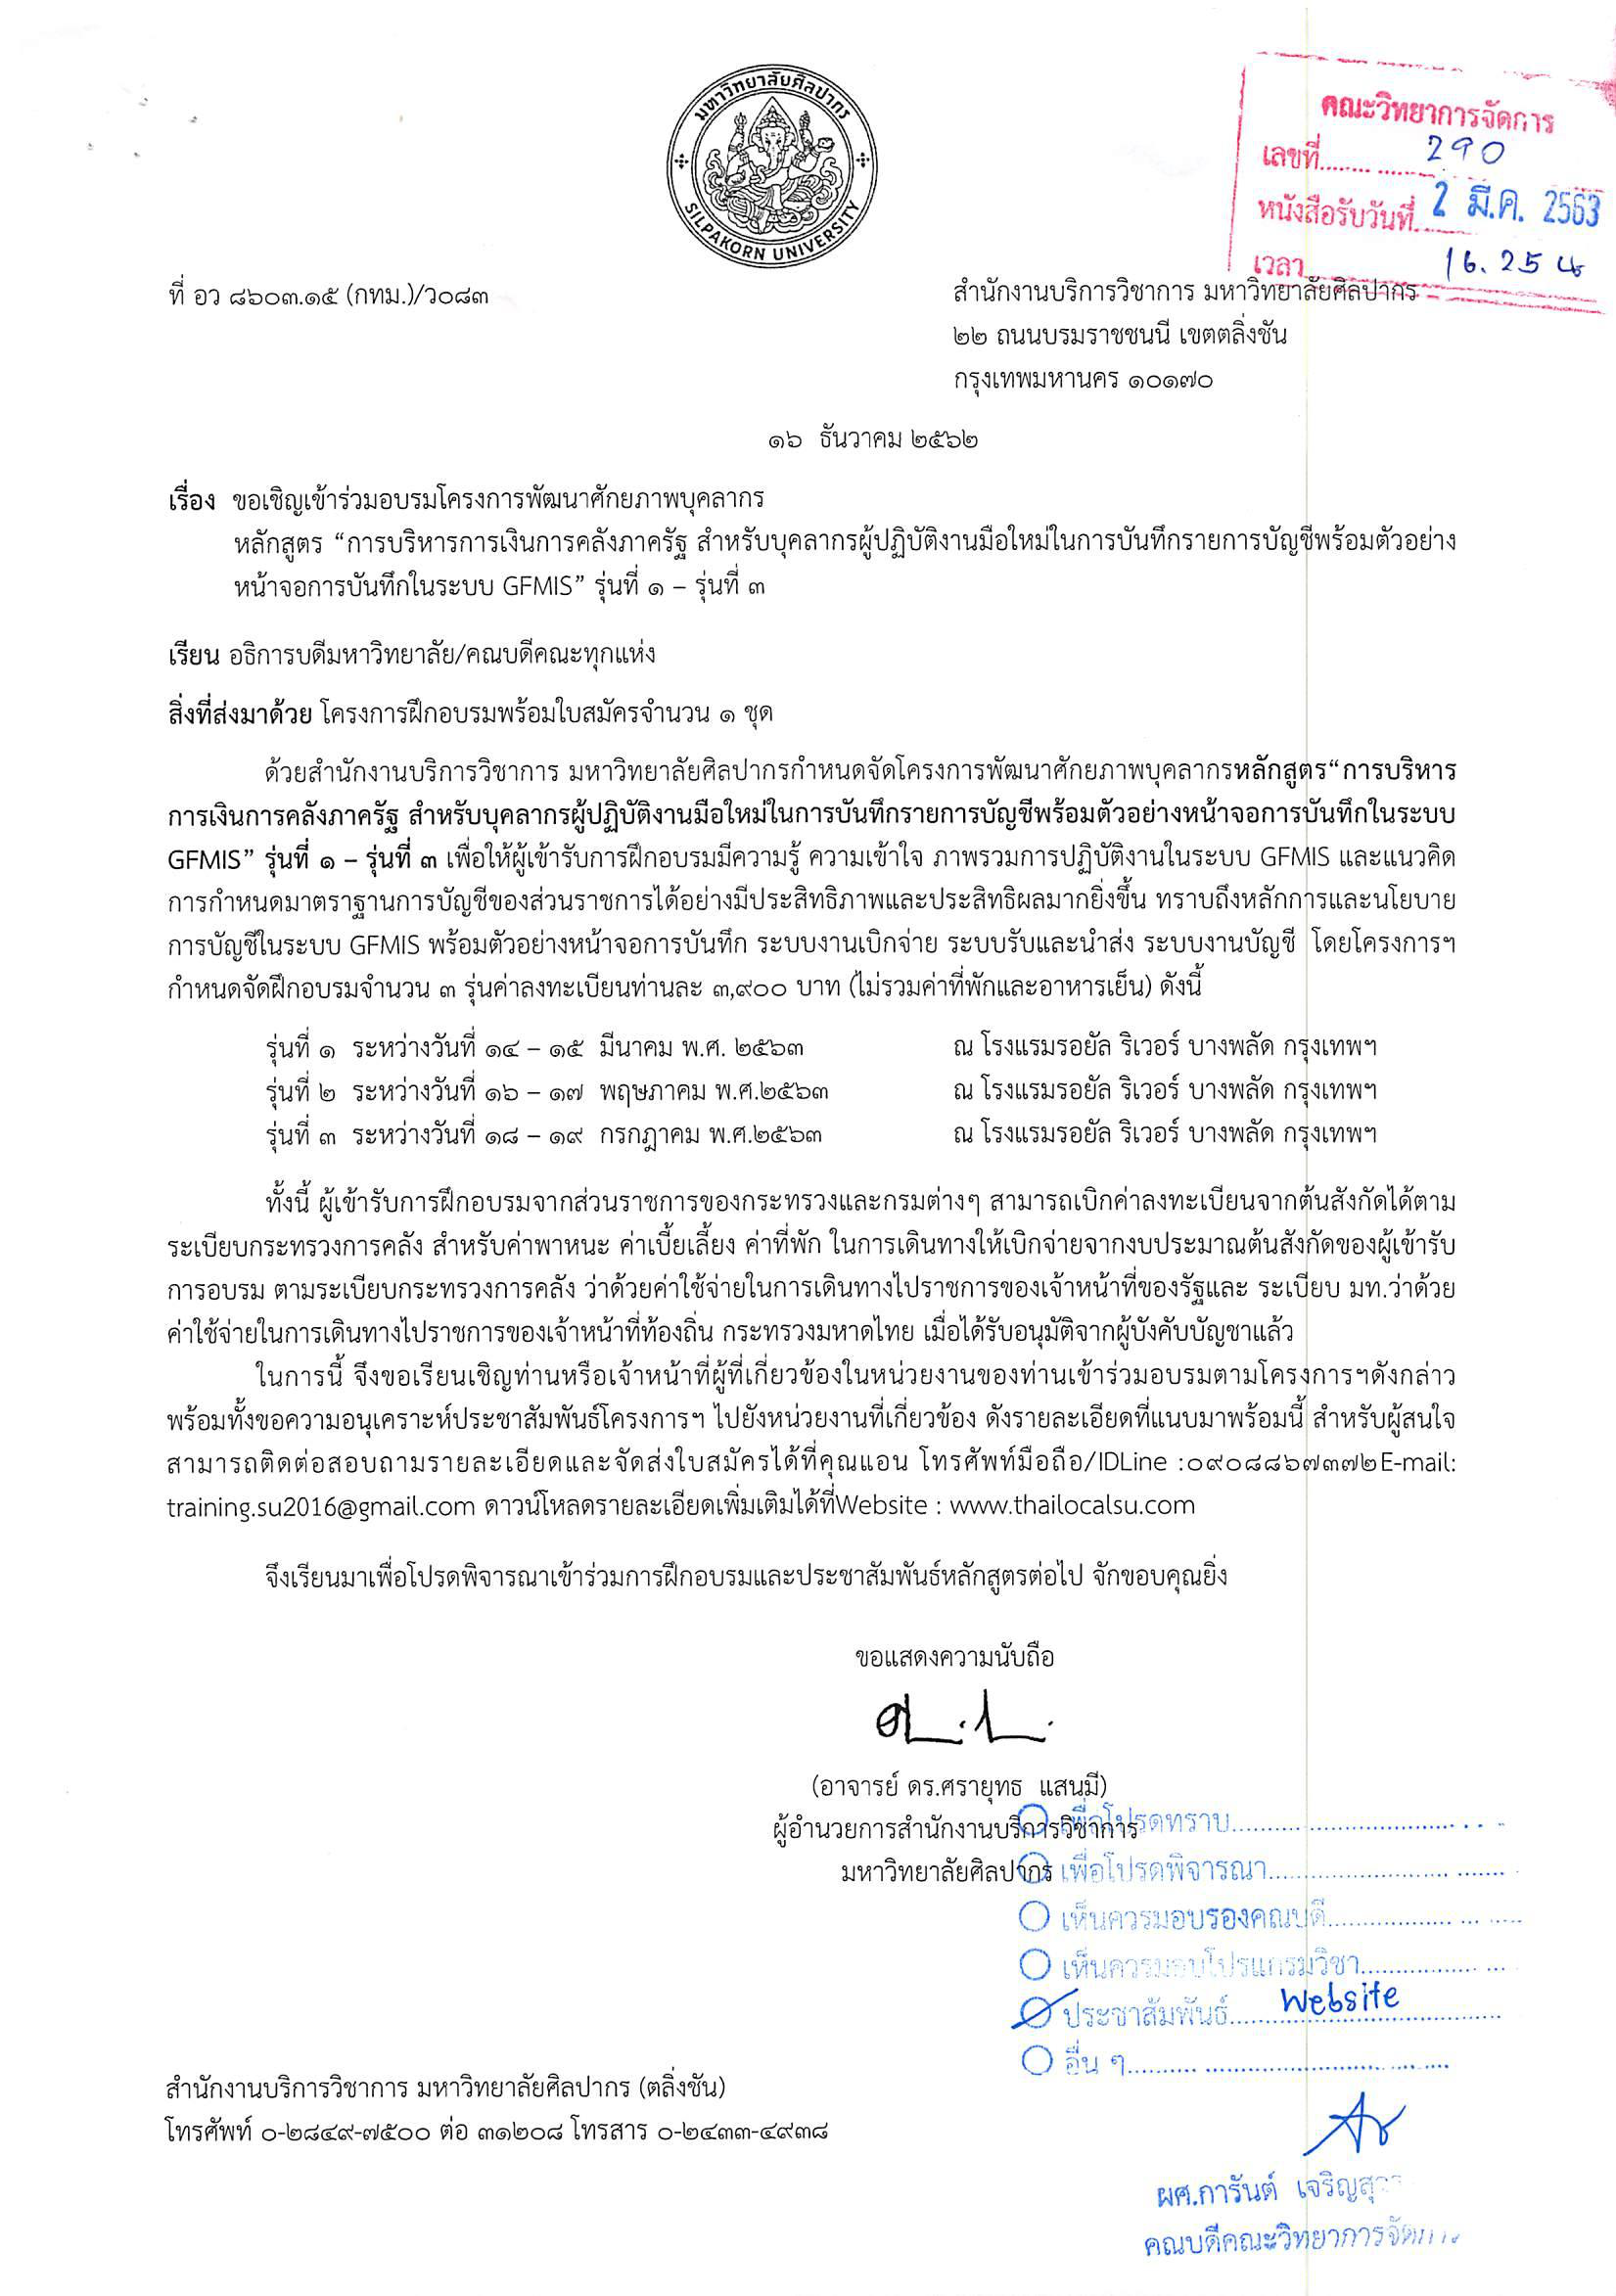

In [24]:
pages[0]

In [26]:
min_height = 0
max_height = 500
min_width = 1200
max_width = 2000

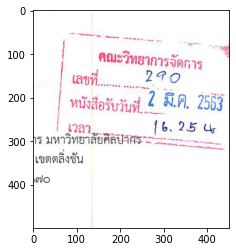

In [27]:
test = np.array(pages[0])[min_height:max_height, min_width:max_width]
plt.imshow(test)

In [28]:
mask_path = ocr.crop_in_area(pages[0], \
                 min_width=min_width, max_width=max_width, min_height=min_height, max_height=max_height, \
                 fromColorRange=np.array([0,10,120]), toColorRange=np.array([15, 255, 255]), \
                 filename=fname, fpath=os.getcwd())

print(mask_path)

/content/290.png


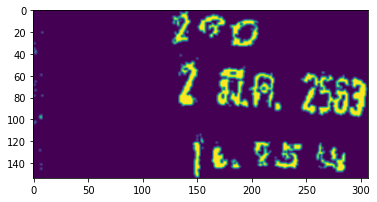

In [29]:
ocr.imshow(mask_path)

In [31]:
find_month = ocr.reader.readtext(mask_path, allowlist ='มคกพมีคเมยพคมิยกคสคกยตคพยธค')
find_month

[([[121, 0], [215, 0], [215, 39], [121, 39]], 'เ', 0.34196847677230835),
 ([[123, 40], [307, 40], [307, 106], [123, 106]],
  'เมีคตี',
  0.07016855478286743),
 ([[139, 114], [296, 114], [296, 154], [139, 154]], 'ต', 0.07616419345140457)]

In [32]:
month = ocr.get_month(find_month[1][1], 'th')

[0.4, 0.0, 0.5454545454545454, 0.36363636363636365, 0.36363636363636365, 0.18181818181818182, 0.2, 0.2, 0.0, 0.2, 0.0, 0.2]


In [33]:
month

'มี.ค.'